# BIOS 470/570 Lecture 11

## Last time we covered:
* ### Introduction to scRNA seq data

## Today we will cover:
* ### Introduction to scanpy:
  - #### data proprocessing
  - #### dimensionality reduction
  - #### plotting

#### I strongly recommend that you create a new environment for the single cell rna seq. You can create a new environment and install packages in it by running:
conda create -n bios_scanpy -c conda-forge scanpy jupyterlab python-igraph leidenalg

#### Essentially all of the packages we have looked at (numpy, pandas scipy, matplotlib, seaborn) are dependencies of these and will be install in the new environment

#### then activate this environment by:
conda activate bios_scanpy

#### The standard convention for importing scanpy is "as sc"

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imageio as iio

### scanpy is based around a data structure call anndata (for annotated data). The main data matrix (of transcript counts for each sample) is stored in a numpy matrix accessed by .X. There is a dataframe for features of variables (genes) accessed by .var and a dataframe for features of observations (cells), accessed by .obs. Additional data that is not associated with a cell or a gene is stored in .uns which is a python dictionary. 

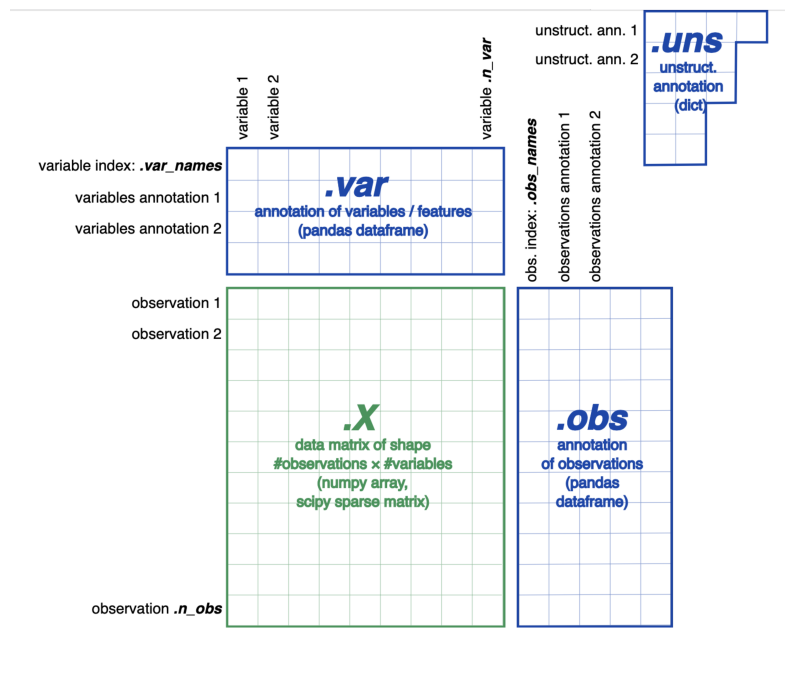

In [2]:
# Show the anndata diagram:
anndata_image = iio.v3.imread('/Users/aw21/Dropbox (Personal)/anndata.png') #read the image
plt.figure(figsize=(10,10))
plt.imshow(anndata_image); #show the image
plt.axis('off'); # don't show the axes around the image

### scanpy is dividing into three basic parts. data preprocessesing (functions accessed from sc.pp), data analysis tools (sc.tl), and plotting functions (sc.pl). 

### today we will look at (part of) a typical workflow on a published dataset from [here](https://elifesciences.org/articles/72811). The paper provided the data as a .h5 file as provided by the 10X genomics software for the scRNA sequcening. scanpy has a function to read this into an anndata object:


In [34]:
adata = sc.read_10x_h5('data/GSE182057_RAW'+'/GSM5517031_filtered_feature_bc_matrix.h5')

/Users/aw21/anaconda3/envs/bios_scanpy/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/aw21/anaconda3/envs/bios_scanpy/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


### We are getting some warnings due to duplicate gene names. There is a function to make these unique:

In [35]:
adata.var.index.duplicated().sum() #lets see how many there are:

10

In [36]:
adata.var_names_make_unique() #make the names unique (adds "-1" or similar)

### We are also getting a lot of "FutureWarnings". We can use the built in warning package to ignore these

In [37]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### let's look at what is inside this anndata object:

In [38]:
adata

AnnData object with n_obs × n_vars = 12948 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

In [39]:
adata.X #this is the actual data

<12948x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 45612501 stored elements in Compressed Sparse Row format>

In [40]:
adata.var #properties of genes

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,GRCh38
AC023491.2,ENSG00000278633,Gene Expression,GRCh38
AC007325.1,ENSG00000276017,Gene Expression,GRCh38
AC007325.4,ENSG00000278817,Gene Expression,GRCh38


In [41]:
adata.obs # properties of cells, not much here yet

""
AAACCCAAGAGGCGGA-1
AAACCCAAGCCGGATA-1
AAACCCAAGGGTACAC-1
AAACCCAAGGTGTGAC-1
AAACCCAAGTATTCCG-1
...
TTTGTTGGTGTGATGG-1
TTTGTTGTCAGTCCGG-1
TTTGTTGTCGTGCACG-1
TTTGTTGTCTAATTCC-1


### The paper also provides a csv file with cell labels that they determined. Let's read it into a dataframe:

In [42]:
labels = pd.read_csv('data/GSE182057_RAW'+'/clusters_wcellid.csv')

In [43]:
labels

,Unnamed: 0,cluster
0,AAACCCAAGAGGCGGA-1,AMLC
1,AAACCCAAGCCGGATA-1,iMeLC
2,AAACCCAAGTGGACGT-1,iMeLC
3,AAACCCACACTAACCA-1,iMeLC
4,AAACCCAGTACATACC-1,AMLC
...,...,...
4090,TTTGGTTTCATTCCTA-1,pluri
4091,TTTGGTTTCCTCGCAT-1,iMeLC
4092,TTTGTTGTCGTGCACG-1,PS
4093,TTTGTTGTCTAATTCC-1,pluri


### The part in "unnamed 0" is the index from the anndata obs dataframe. These are unique identifiers for cells. Let's make this the index of this dataframe and then pull the label data into the anndata object:

In [44]:
labels.index = labels.loc[:,"Unnamed: 0"]
adata.obs["label"] = labels["cluster"]
adata #note there is now something under the obs field:

AnnData object with n_obs × n_vars = 12948 × 36601
    obs: 'label'
    var: 'gene_ids', 'feature_types', 'genome'

In [45]:
adata.obs

,label
AAACCCAAGAGGCGGA-1,AMLC
AAACCCAAGCCGGATA-1,iMeLC
AAACCCAAGGGTACAC-1,NaN
AAACCCAAGGTGTGAC-1,NaN
AAACCCAAGTATTCCG-1,NaN
...,...
TTTGTTGGTGTGATGG-1,NaN
TTTGTTGTCAGTCCGG-1,NaN
TTTGTTGTCGTGCACG-1,PS
TTTGTTGTCTAATTCC-1,pluri


### Now let's look at some typical preprocessing steps for data. First, we can use the filter genes, and filter cells functions to remove genes that are only expressed in a small number of cells or cells with too few expressed genes detected. By default, these functions operate in place on the adata object:

In [46]:
sc.pp.filter_cells(adata,min_genes=1200)

In [47]:
adata

AnnData object with n_obs × n_vars = 8857 × 36601
    obs: 'label', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome'

### About 4000 cells have been removed for having too few genes

In [48]:
sc.pp.filter_genes(adata,min_cells=10)

In [49]:
adata

AnnData object with n_obs × n_vars = 8857 × 21331
    obs: 'label', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

### About 15000 genes have been removed

### Now let's compute and look at some additional quality control metrics. One metric is the fraction of mitochordrial reads. To get this, we need to label all the genes that are mitochondrial:

In [50]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'

### Now compute some metrics and plot them:

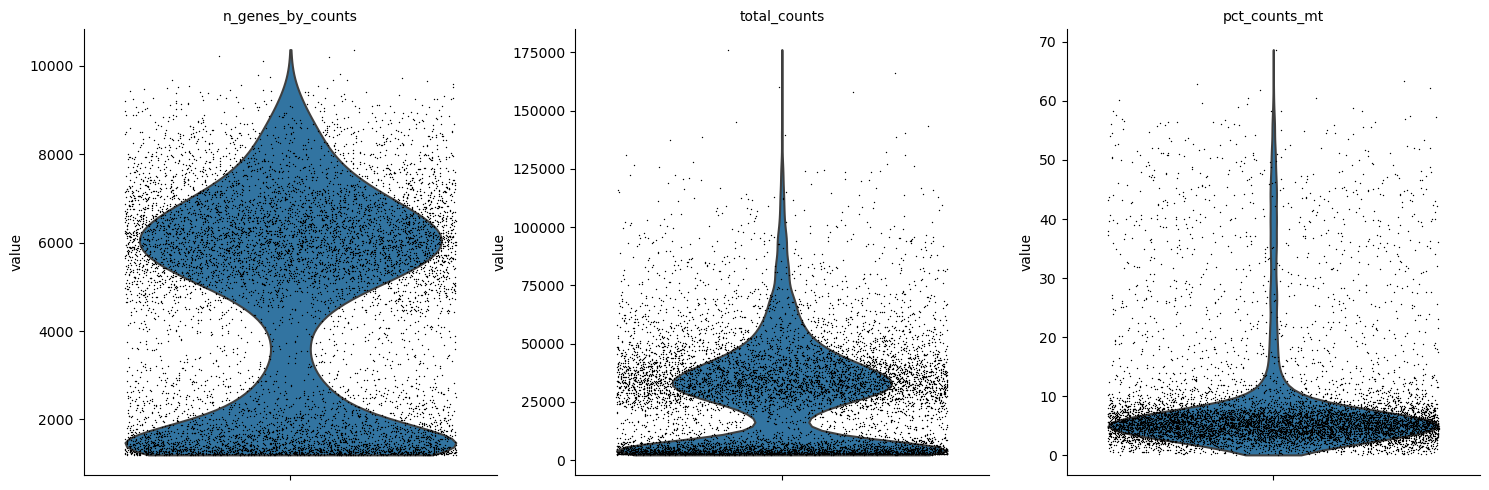

In [51]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

### Notice that these metrics have most cells within a window of good values and then a second window of low quality cell such as too few genes or total counts. We can also plot these metrics against each other:

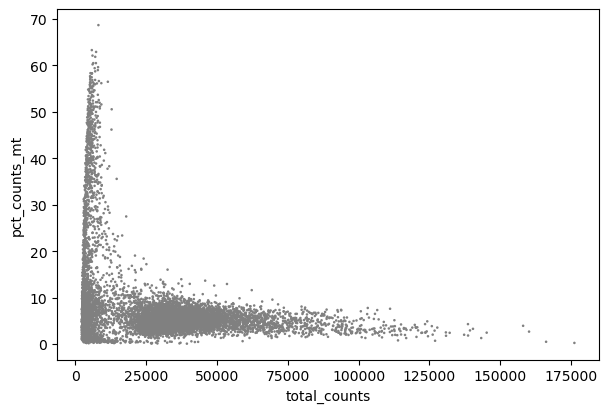

In [52]:
sc.pl.scatter(adata,x='total_counts',y='pct_counts_mt')

### Notice these are anticorrelated - genes with a high fraction of mitochodrial counts, have very few counts overall. Let's filter the data further using boolean indexing:

In [53]:
adata = adata[adata.obs["pct_counts_mt"] < 10,:]

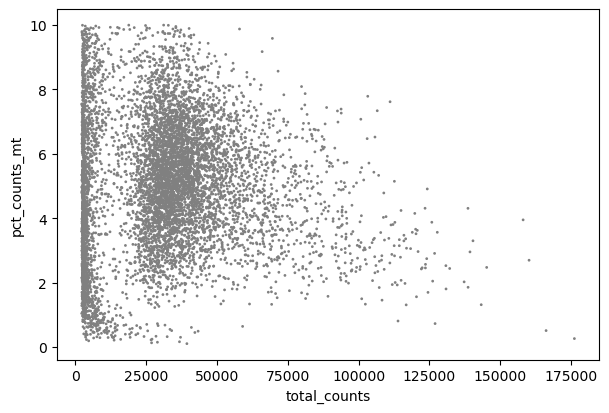

In [54]:
sc.pl.scatter(adata,x='total_counts',y='pct_counts_mt')

### This has now been cutoff below 10% mitochondrial reads. There is also a set with very low count numbers, lets remove these too:

In [55]:
adata = adata[adata.obs["total_counts"] > 12000,:]

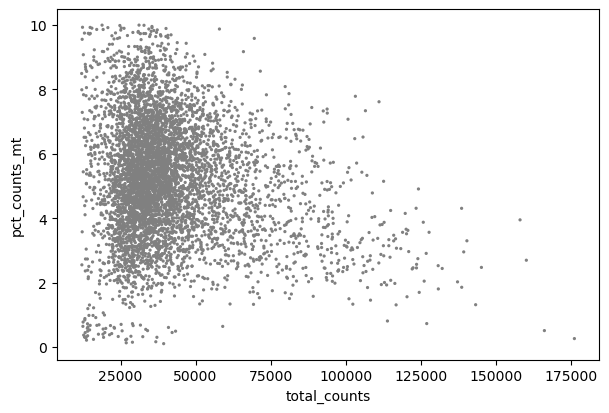

In [56]:
sc.pl.scatter(adata,x='total_counts',y='pct_counts_mt')

### This looks better. Let's see what adata looks like now:

In [57]:
adata

View of AnnData object with n_obs × n_vars = 5553 × 21331
    obs: 'label', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [58]:
adata.obs

,label,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCCAAGAGGCGGA-1,AMLC,6632,6632,42707.0,2892.0,6.771724
AAACCCAAGCCGGATA-1,iMeLC,7089,7085,42789.0,1614.0,3.771998
AAACCCAAGGGTACAC-1,NaN,8321,8317,77524.0,3837.0,4.949435
AAACCCAAGTATTCCG-1,NaN,8053,8050,61477.0,4136.0,6.727719
AAACCCAAGTGGACGT-1,iMeLC,6267,6263,38665.0,2137.0,5.526962
...,...,...,...,...,...,...
TTTGGTTTCCTCGCAT-1,iMeLC,6518,6514,38524.0,2045.0,5.308379
TTTGTTGGTGTGATGG-1,NaN,8981,8968,81757.0,5223.0,6.388444
TTTGTTGTCGTGCACG-1,PS,5694,5692,39406.0,1939.0,4.920570
TTTGTTGTCTAATTCC-1,pluri,4834,4832,27281.0,648.0,2.375280


### We can see that not all cells were labeled. In the paper, they performed various filtering on the cells and only labeled the cells that passed all filters. Let's restrict analysis to the labeled cells for now. Note you can use boolean indexing on the anndata object as above or you can index cells/genes by their index. Here we drop the Na values from the cell dataframe and then use the index after dropping to keep only the good cells. 

In [59]:
adata = adata[adata.obs.dropna().index]

In [60]:
adata.obs

,label,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCCAAGAGGCGGA-1,AMLC,6632,6632,42707.0,2892.0,6.771724
AAACCCAAGCCGGATA-1,iMeLC,7089,7085,42789.0,1614.0,3.771998
AAACCCAAGTGGACGT-1,iMeLC,6267,6263,38665.0,2137.0,5.526962
AAACCCACACTAACCA-1,iMeLC,7352,7350,40683.0,3242.0,7.968930
AAACCCAGTACATACC-1,AMLC,6496,6493,38204.0,1941.0,5.080620
...,...,...,...,...,...,...
TTTGGTTTCATTCCTA-1,pluri,6582,6577,40708.0,1563.0,3.839540
TTTGGTTTCCTCGCAT-1,iMeLC,6518,6514,38524.0,2045.0,5.308379
TTTGTTGTCGTGCACG-1,PS,5694,5692,39406.0,1939.0,4.920570
TTTGTTGTCTAATTCC-1,pluri,4834,4832,27281.0,648.0,2.375280


### We see that now all the cells have labels, other cells have been dropped

### It is typical to normalize the data so that each cell has the same total number of counts and to do log(data+1). scanpy as built in functions to do this in place

In [61]:
sc.pp.normalize_total(adata,target_sum=1e4)
sc.pp.log1p(adata)

/Users/aw21/anaconda3/envs/bios_scanpy/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


### As in our other analyses, it is common to keep only highly variable genes. Scanpy can do this directly by first adding a highly variable flag to the gene dataframe. One way to do this is to specify the number of genes you want to work with. you can also specify cutoffs in mearures of variability, see the documentation for the function.

In [62]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

### Before going further it is common to save the data in adata.raw in case you want to recover the original dataset:

In [63]:
adata.raw = adata

### Now keep only the highly variable genes:

In [64]:
adata = adata[:,adata.var.highly_variable]

In [65]:
adata

View of AnnData object with n_obs × n_vars = 4095 × 2000
    obs: 'label', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

### Now let's run pca on the dataset. This is a prerequisite for some other types of data reduction like umap

In [66]:
sc.tl.pca(adata,svd_solver="arpack")

/Users/aw21/anaconda3/envs/bios_scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


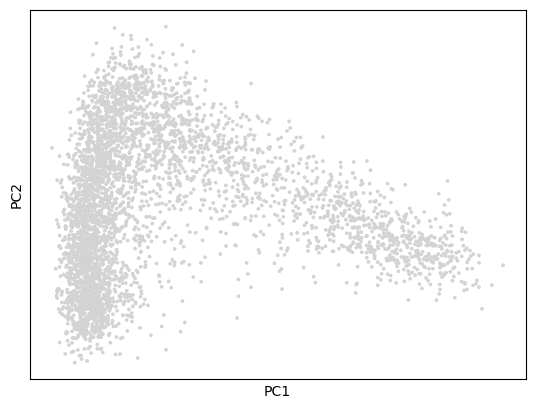

In [67]:
sc.pl.pca(adata) # both the principle components

### The plotting functions to scanpy all take a color = argument. Here let's color the points by the label given to them by the authors of the paper, which we stored in the .obs column "label"

/Users/aw21/anaconda3/envs/bios_scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


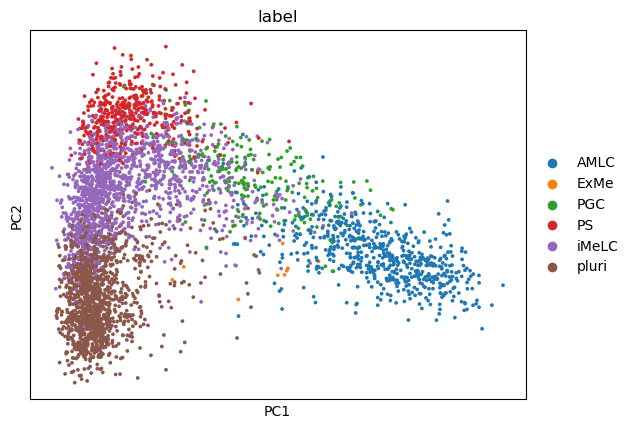

In [68]:
sc.pl.pca(adata,color = "label")

### We see that the PCA actually does a pretty good job of separating cells by type. We can also plot the values of genes. If we give a list of things to plot to color, it will make an array of subplots:

/Users/aw21/anaconda3/envs/bios_scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


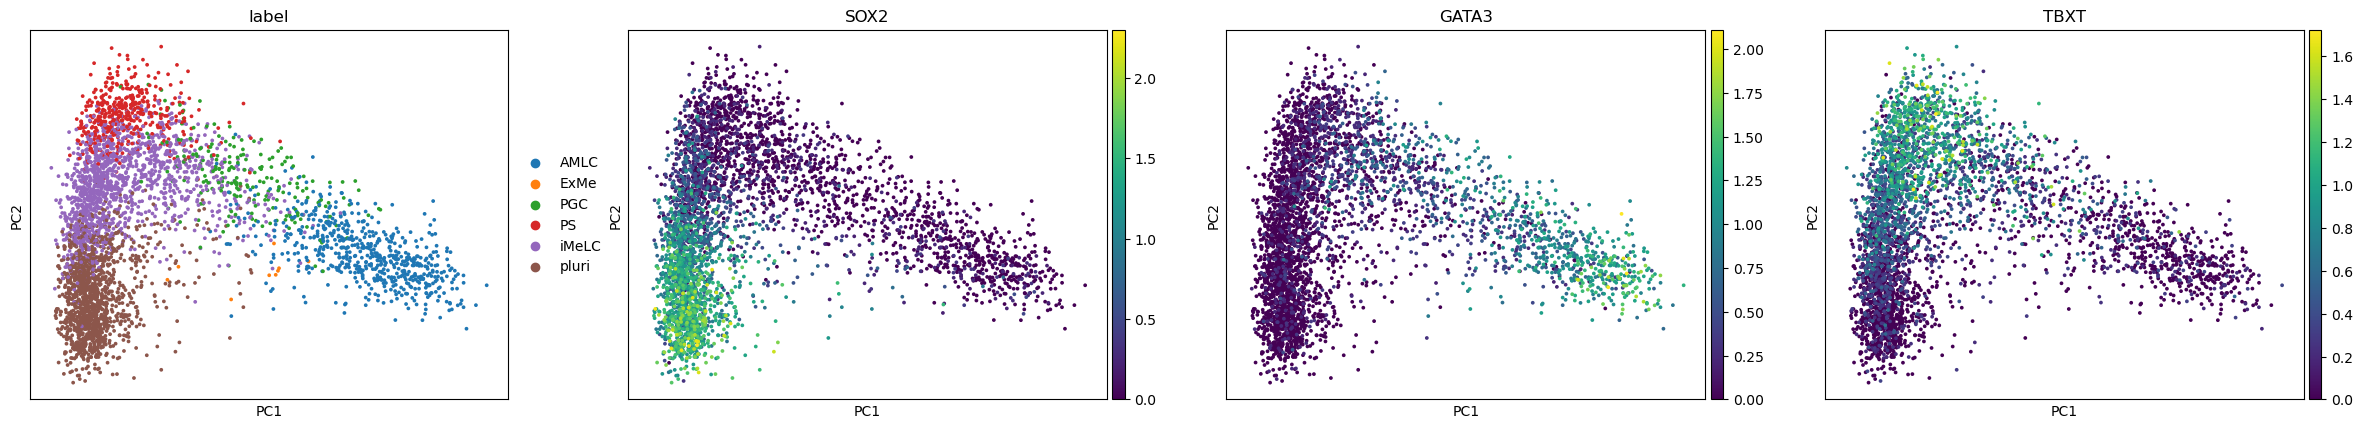

In [69]:
sc.pl.pca(adata,color = ['label','SOX2','GATA3','TBXT'])

### Let's look at a different representation of the data, umap. umap requires a nearest neighbor calculation to do be done first:

In [70]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/aw21/anaconda3/envs/bios_scanpy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/aw21/anaconda3/envs/bios_scanpy/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


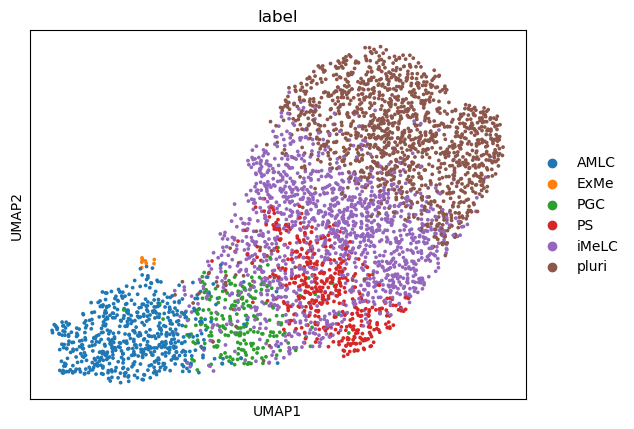

In [71]:
sc.pl.umap(adata, color = "label")

### Some other common plots for looking at expression of specific genes:

### Dot plot. Size of dot indicates fraction of expression cells in that group. Color is expression level

/Users/aw21/anaconda3/envs/bios_scanpy/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


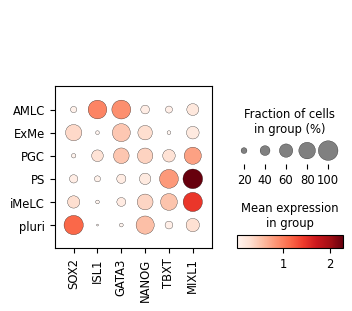

In [72]:
geneList = ["SOX2","ISL1","GATA3","NANOG","TBXT","MIXL1"]
sc.pl.dotplot(adata, groupby="label",var_names= geneList)

### Matrix plot. heatmap of group expression by group. No info on fraction of expressing cells, just averages

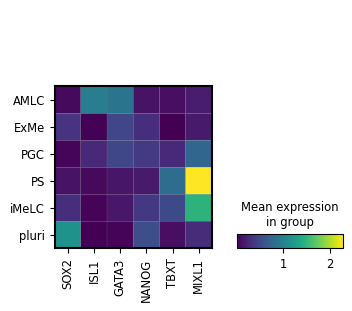

In [73]:
sc.pl.matrixplot(adata,groupby="label",var_names=geneList)

### Heatmap. Color plot of single cell data. Cells can be grouped by label, but no averaging is done as is done in matrixplot:

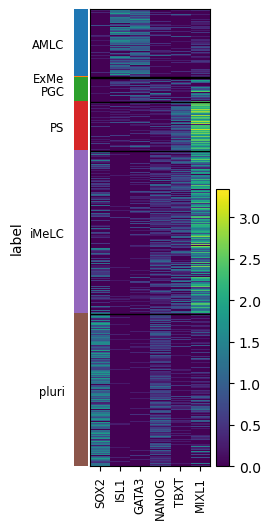

In [74]:
sc.pl.heatmap(adata,var_names=geneList,groupby = "label")